In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.csv')
stud.info(50)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [3]:
#приведем пустые и пропущенные значения к единому виду
for col in stud:
    stud[col] = stud[col].apply(lambda x : None if 'nan' in str.lower(str(x)) else x)

In [4]:
#проверяем правильность заполнения таблицы school sex address famsize Pstatus Mjob Fjob reason guardian
for col in stud:
    display(stud[col].value_counts())

GP    349
MS     46
Name: school, dtype: int64

F    208
M    187
Name: sex, dtype: int64

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

U    295
R     83
Name: address, dtype: int64

GT3    261
LE3    107
Name: famsize, dtype: int64

T    314
A     36
Name: Pstatus, dtype: int64

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

mother    250
father     86
other      28
Name: guardian, dtype: int64

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

no     335
yes     51
Name: schoolsup, dtype: int64

yes    219
no     137
Name: famsup, dtype: int64

no     200
yes    155
Name: paid, dtype: int64

yes    195
no     186
Name: activities, dtype: int64

yes    300
no      79
Name: nursery, dtype: int64

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64

yes    356
no      19
Name: higher, dtype: int64

yes    305
no      56
Name: internet, dtype: int64

no     240
yes    124
Name: romantic, dtype: int64

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

In [72]:
#1 OK school — аббревиатура школы, в которой учится ученик
#2 OK sex — пол ученика ('F' - женский, 'M' - мужской)
#3 OK age — возраст ученика (от 15 до 22)
#4 OK address — тип адреса ученика ('U' - городской, 'R' - за городом)
#5 OK famsize — размер семьи('LE3' <= 3, 'GT3' >3)
#6 OK Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
#7 OK Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
#8 ЕСТЬ ЗНАЧЕНИЯ ВНЕ ДИАПАЗОНА Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
#9 OK Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
#10 OK Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
#11 OK reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
#12 OK guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
#13 OK traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
#14 OK studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
#15 OK failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
#16 OK schoolsup — дополнительная образовательная поддержка (yes или no)
#17 OK famsup — семейная образовательная поддержка (yes или no)
#18 OK paid — дополнительные платные занятия по математике (yes или no)
#19 OK activities — дополнительные внеучебные занятия (yes или no)
#20 OK nursery — посещал детский сад (yes или no)
#21 OK higher — хочет получить высшее образование (yes или no)
#22 OK internet — наличие интернета дома (yes или no)
#23 OK romantic — в романтических отношениях (yes или no)
#24 ЕСТЬ ЗНАЧЕНИЯ ВНЕ ДИАПАЗОНА famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
#25 OK freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
#26 OK goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
#27 OK health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
#28 OK absences — количество пропущенных занятий
#29 СЛИШКОМ МНОГО НУЛЕВЫХ ОЦЕНОК score — баллы по госэкзамену по математике

    

In [ ]:
#исправляем ошибки    

In [6]:
#8 ЕСТЬ ЗНАЧЕНИЯ ВНЕ ДИАПАЗОНА Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - в() 
stud.Fedu.loc[stud.Fedu == 40] = 4
stud.Fedu.value_counts()

2.0    106
3.0     96
4.0     89
1.0     78
0.0      2
Name: Fedu, dtype: int64

In [7]:
#24 ЕСТЬ ЗНАЧЕНИЯ ВНЕ ДИАПАЗОНА famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
stud.famrel.loc[stud['famrel'] == -1.0] = 1.0
stud.famrel.value_counts()

4.0    182
5.0     99
3.0     62
2.0     17
1.0      8
Name: famrel, dtype: int64

In [190]:
#Проанализируем числовые столбцы и удалим выбросы
#age
#absences
#score


In [8]:
#age 
stud.age.value_counts()
#Значений в принципе немного и они довольно кучные, очевидно что выбросов тут нет

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

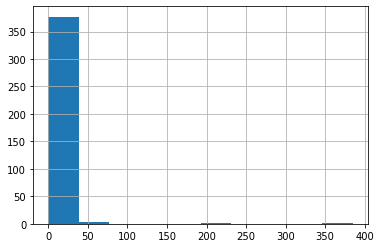

In [9]:
#absences
stud.absences.hist()
stud.absences.describe()
#выбросы очевидно есть, определим их по формуле интерквартильного расстояния

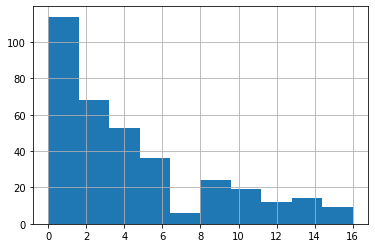

In [11]:
median = stud.absences.median()
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
stud.absences.loc[stud.absences.between(median - 1.5*IQR, median + 1.5*IQR)].hist()

In [12]:
len(stud.absences.loc[stud.absences.between(median - 1.5*IQR, median + 1.5*IQR)])/len(stud.absences) #определим долю "выпавших" измерений

0.8987341772151899

In [13]:
#утратили совсем небольшое количество наблюдений, поэтому этот метод считаем успешно примененным
stud = stud.loc[stud.absences.between(median - 1.5*IQR, median + 1.5*IQR)] #отбрасываем ненужные данные

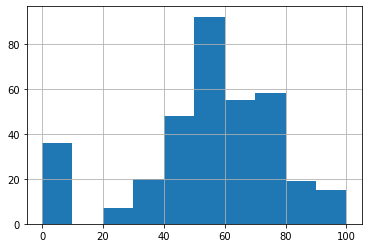

In [14]:
#score
stud.score.hist()
#очевидно, что часть значений утеряна, распределение близкое к нормальному, нулевые значения отсекаем

In [16]:
stud = stud.loc[stud.score != 0] #удаляем строки с нулевым значением
stud = stud.loc[pd.isnull(stud.score) == False] #удаляем строки с пустым значением

In [17]:
#проведем корреляционный анализ для числовых величин
corr_stud = stud[['score','absences','age','Medu','Fedu','traveltime','studytime','famrel','freetime','goout','health', 'studytime, granular', 'failures']].corr()
corr_stud

,score,absences,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,health,"studytime, granular",failures
score,1.000000,-0.228055,-0.139133,0.187431,0.131943,-0.082367,0.143647,0.074168,-0.007956,-0.199393,-0.058350,-0.143647,-0.288309
absences,-0.228055,1.000000,0.192561,0.087991,-0.006420,-0.052914,-0.054869,-0.109982,0.071406,0.162470,-0.017692,0.054869,0.183278
age,-0.139133,0.192561,1.000000,-0.134997,-0.143197,0.088483,0.007275,0.064372,0.026464,0.144829,-0.030568,-0.007275,0.203033
Medu,0.187431,0.087991,-0.134997,1.000000,0.609676,-0.178028,0.083461,-0.006578,0.032750,0.043306,-0.047246,-0.083461,-0.215693
Fedu,0.131943,-0.006420,-0.143197,0.609676,1.000000,-0.146331,-0.018733,-0.013475,0.005747,-0.000450,0.000008,0.018733,-0.309017
traveltime,-0.082367,-0.052914,0.088483,-0.178028,-0.146331,1.000000,-0.101730,-0.020215,0.011461,0.025664,0.015947,0.101730,0.103164
studytime,0.143647,-0.054869,0.007275,0.083461,-0.018733,-0.101730,1.000000,0.056705,-0.137033,-0.016633,-0.096277,-1.000000,-0.162953
famrel,0.074168,-0.109982,0.064372,-0.006578,-0.013475,-0.020215,0.056705,1.000000,0.171663,0.044316,0.106583,-0.056705,0.001015
freetime,-0.007956,0.071406,0.026464,0.032750,0.005747,0.011461,-0.137033,0.171663,1.000000,0.291464,0.063869,0.137033,0.128090
goout,-0.199393,0.162470,0.144829,0.043306,-0.000450,0.025664,-0.016633,0.044316,0.291464,1.000000,0.019434,0.016633,0.103787


In [18]:
corr_stud.loc[abs(corr_stud.score) < 0.1] #отберем наименее коррелирующие величины со score

,score,absences,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,health,"studytime, granular",failures
traveltime,-0.082367,-0.052914,0.088483,-0.178028,-0.146331,1.000000,-0.101730,-0.020215,0.011461,0.025664,0.015947,0.101730,0.103164
famrel,0.074168,-0.109982,0.064372,-0.006578,-0.013475,-0.020215,0.056705,1.000000,0.171663,0.044316,0.106583,-0.056705,0.001015
freetime,-0.007956,0.071406,0.026464,0.032750,0.005747,0.011461,-0.137033,0.171663,1.000000,0.291464,0.063869,0.137033,0.128090
health,-0.058350,-0.017692,-0.030568,-0.047246,0.000008,0.015947,-0.096277,0.106583,0.063869,0.019434,1.000000,0.096277,0.083782


In [26]:
stud.drop(['traveltime','famrel','freetime','health', 'studytime, granular'], axis='columns', inplace=True) #удаляем столбцы в том числе studytime, granular - т.к. он 100% коррелирует со столбцом studytime


In [19]:
#Проанализируем номинативные переменные
def get_boxplot(column): #определим функцию для построения нескольких боксплотов 
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    

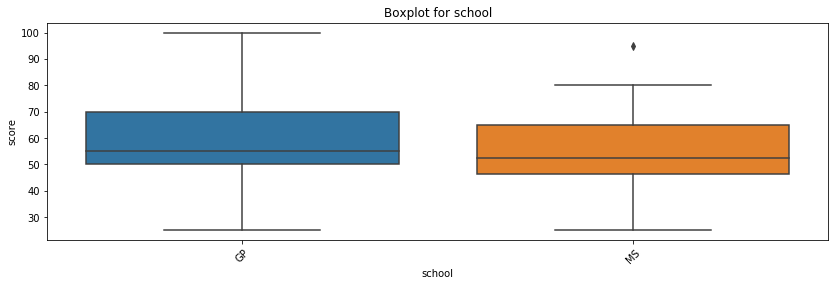

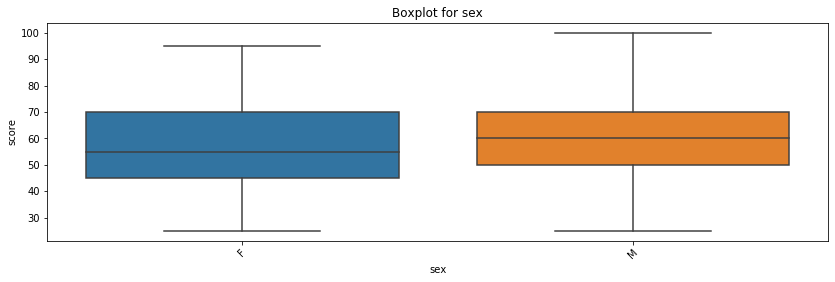

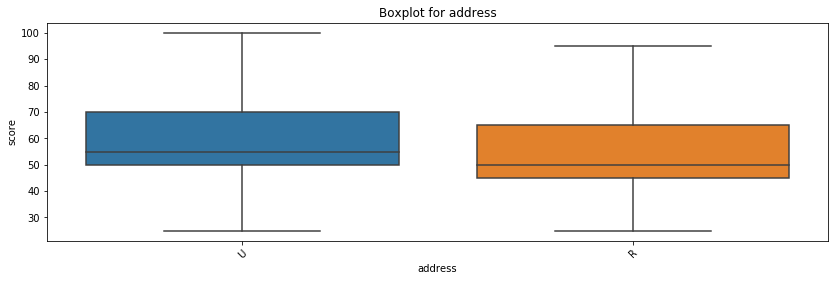

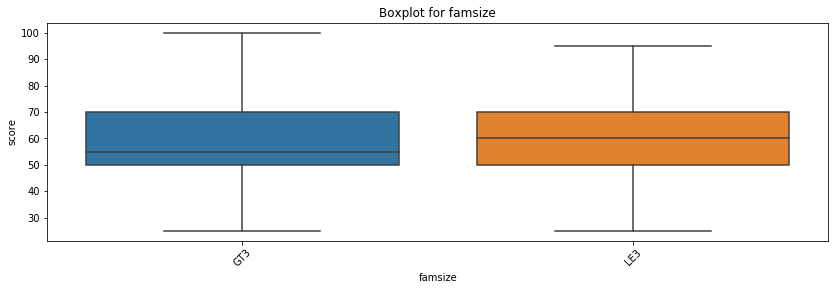

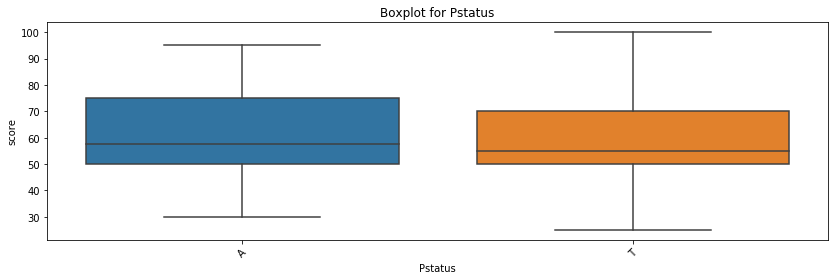

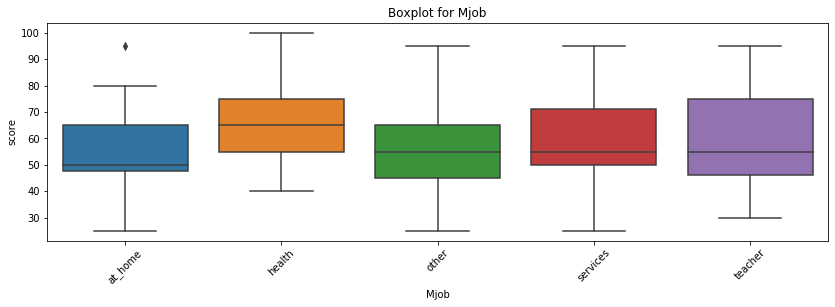

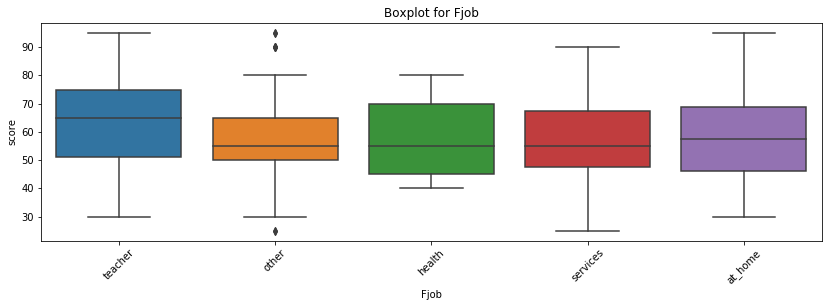

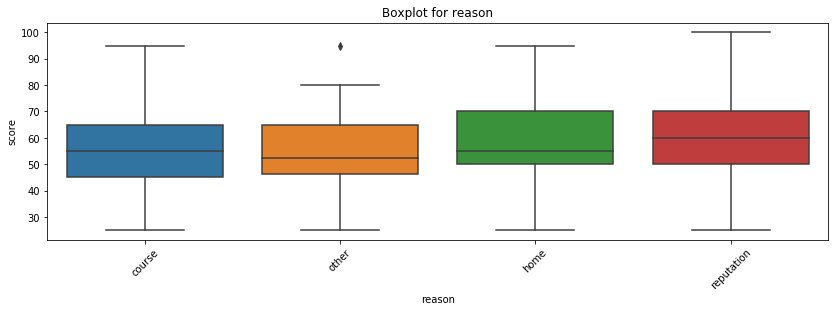

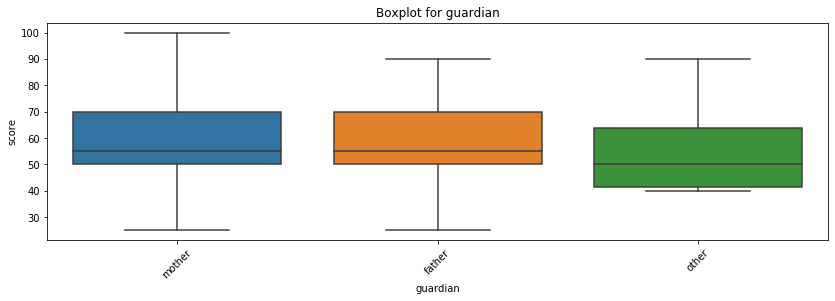

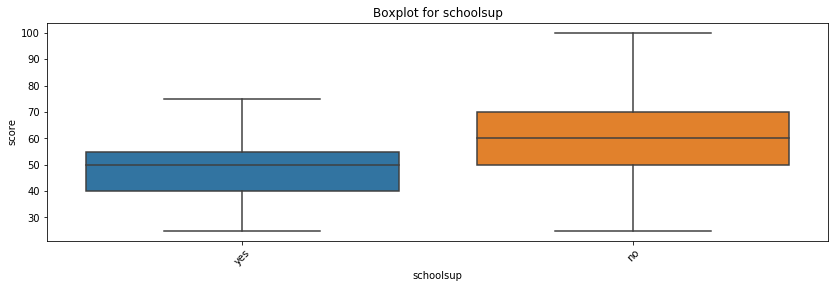

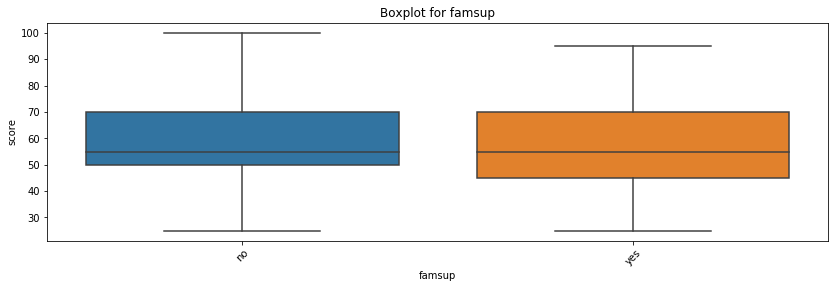

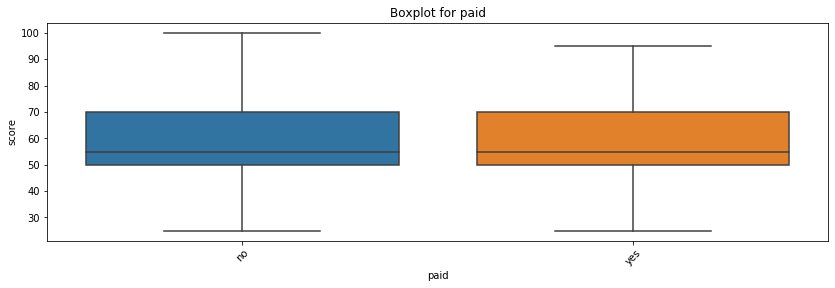

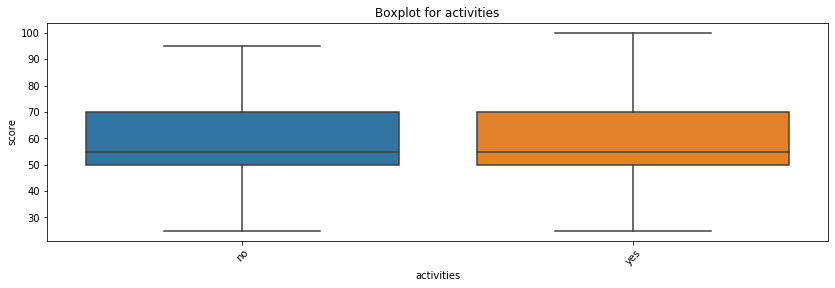

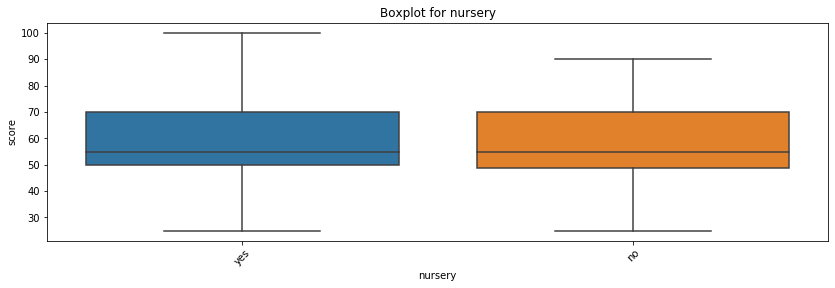

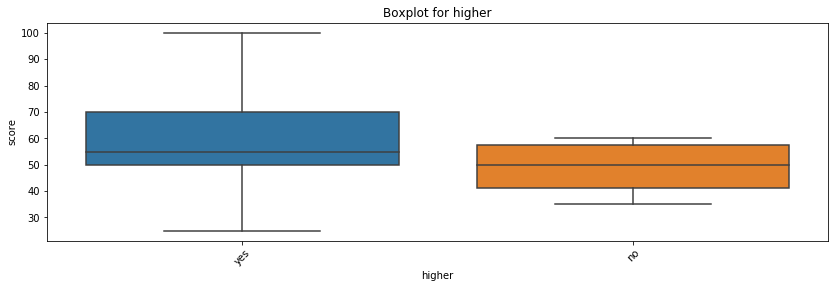

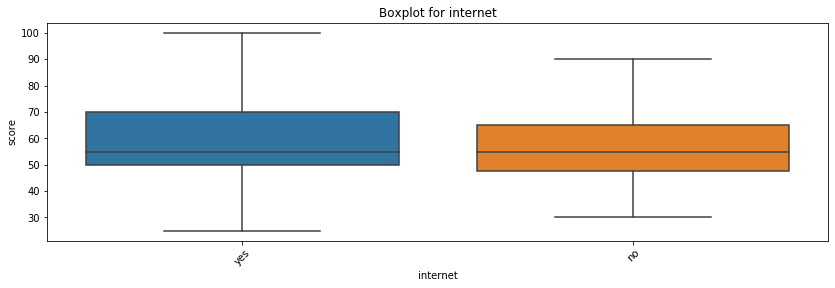

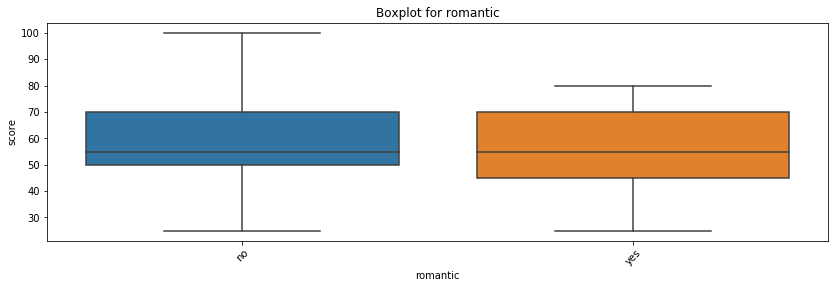

In [20]:
for col in ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']:
     get_boxplot(col) #запустим функцию по всем номинативным переменным
    

In [21]:
def get_stat_dif(column): #определим функцию для проведения теста Стьюдента о зависимости переменных и score
    cols = stud.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


In [23]:
for col in ['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']:
     get_stat_dif(col) #запустим функцию по всем номинативным переменным
    

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки schoolsup


In [24]:
stud.drop(['school','famsize','Pstatus','Fjob','reason','guardian','famsup','paid','activities','nursery','higher','internet','romantic'], axis='columns', inplace=True) #удаляем столбцы

In [31]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314 entries, 0 to 394
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        314 non-null    object 
 1   age        314 non-null    int64  
 2   address    301 non-null    object 
 3   Medu       312 non-null    float64
 4   Fedu       295 non-null    float64
 5   Mjob       300 non-null    object 
 6   studytime  309 non-null    float64
 7   failures   297 non-null    float64
 8   schoolsup  305 non-null    object 
 9   goout      309 non-null    float64
 10  absences   314 non-null    float64
 11  score      314 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 31.9+ KB


In [ ]:
#выводы
#1) Изначальные данные были неплохими, были устранены несколько выбросов, а также исправлено несколько ошибок
#2) Было много нулевых значений в колонке score, но заполнить их, к сожалению, не удалось
#3) Из 29 признаков в результате анализа значимых осталось 11
#4) Интересно. Образование матери больше влиеяет на оценку, чем образование отца